This is my sixth kernel series contribution to <a href="https://www.kaggle.com/c/ds4g-environmental-insights-explorer/overview"> DS4G: Environmental Insights Explorer </a> to analyze the impacts of air pollution at a particular Geographical area and location

In this kernel, will go through the methodology for calculating marginal emissions factors for the sub-national region

* 1. <a href="#overview">Overview on Marginal Emission Factor</a>
* 2. <a href="#100mile">Methdology to calculate Marginal Emission Factor for power plants</a>

<p id="overview" style="color:#703bdb; font-size:20px">Overview on Marginal Emission Factor</p>
<hr size="30">

The correct way to measure the impact of environmental decisions is to use marginal emissions factors.
Marginal emissions factors measure the actual environmental consequences of taking different potential actions on the power grid. 

For example, if city is evaluating an energy efficiency measure to conserve one megawatt-hour of electricity consumption, this program will reduce local emissions by reducing output at one or more power plants. 

But which power plants? Many sources of power, 

for example most solar panels, are designed to send all the energy they can to the power grid no matter the level of energy demand. Thus, they will be completely unaffected. 

Conserving energy only affects some power plants: those which can scale up or down in
response, known as the “marginal” power plants. Marginal emissions measure the emissions per
kilowatt-hour only from these power plants, thus accurately measuring real-world results.

Let's look at an high level overview of the power plants that use fuel type oil, gas and coal in different counties. The following plot shows the power plants available in different counties. The legend of the graph is explained in following representations:

* County polygon - <font color='brown'> Brown color </font>
* 100 mile buffer polygon from power plant -<font color='blue'> Blue color </font>
* 50 mile buffer polygon from power plant -<font color='purple'> Purple color </font>
* Power plant -<font color='green'> Green color </font>
* County polygon highlighted in  - <font color='yellow'> Yellow color </font> are top two counties having maximum emission factor

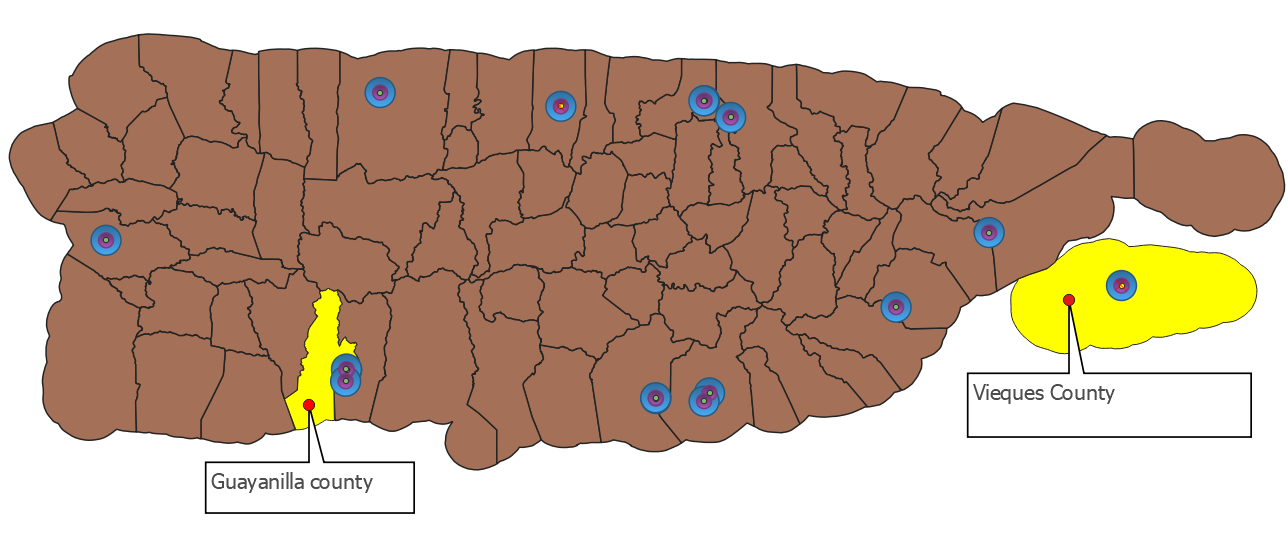


<p id="100mile" style="color:#703bdb; font-size:20px">Methdology to calculate Marginal Emission Factor for power plants</p>
<hr size="30">

<p style="color:#703bdb; font-size:15px">Analysis within 100 mile buffer area from power plant</p>

To calculate marginal emission factor, we used below techniques

* Perform sum  of two columns NO2_column_number_density + NO2_slant_column_number_density available in Sentinel 5P satelite imagery  which is intersecting with 100mile geographical area from power plant.
* estimated capacity of power plant received as input parameter for a specific power plant.Values in this data frame are annual basis, hence converted this value to a single day by dividing with 365

So EF = (NO2_column_number_density + NO2_slant_column_number_density) / (estimated capacity of power plant/365 )


Overlaying, Emission Factor, Electricity generated by power plant display plot as below.

Below plot describes there are up and downs in emission factor which varies on amount of power generation but there is no much variation identified in plot for power generated. This proves the power generation data should be more accurate to see the good results of emission factor


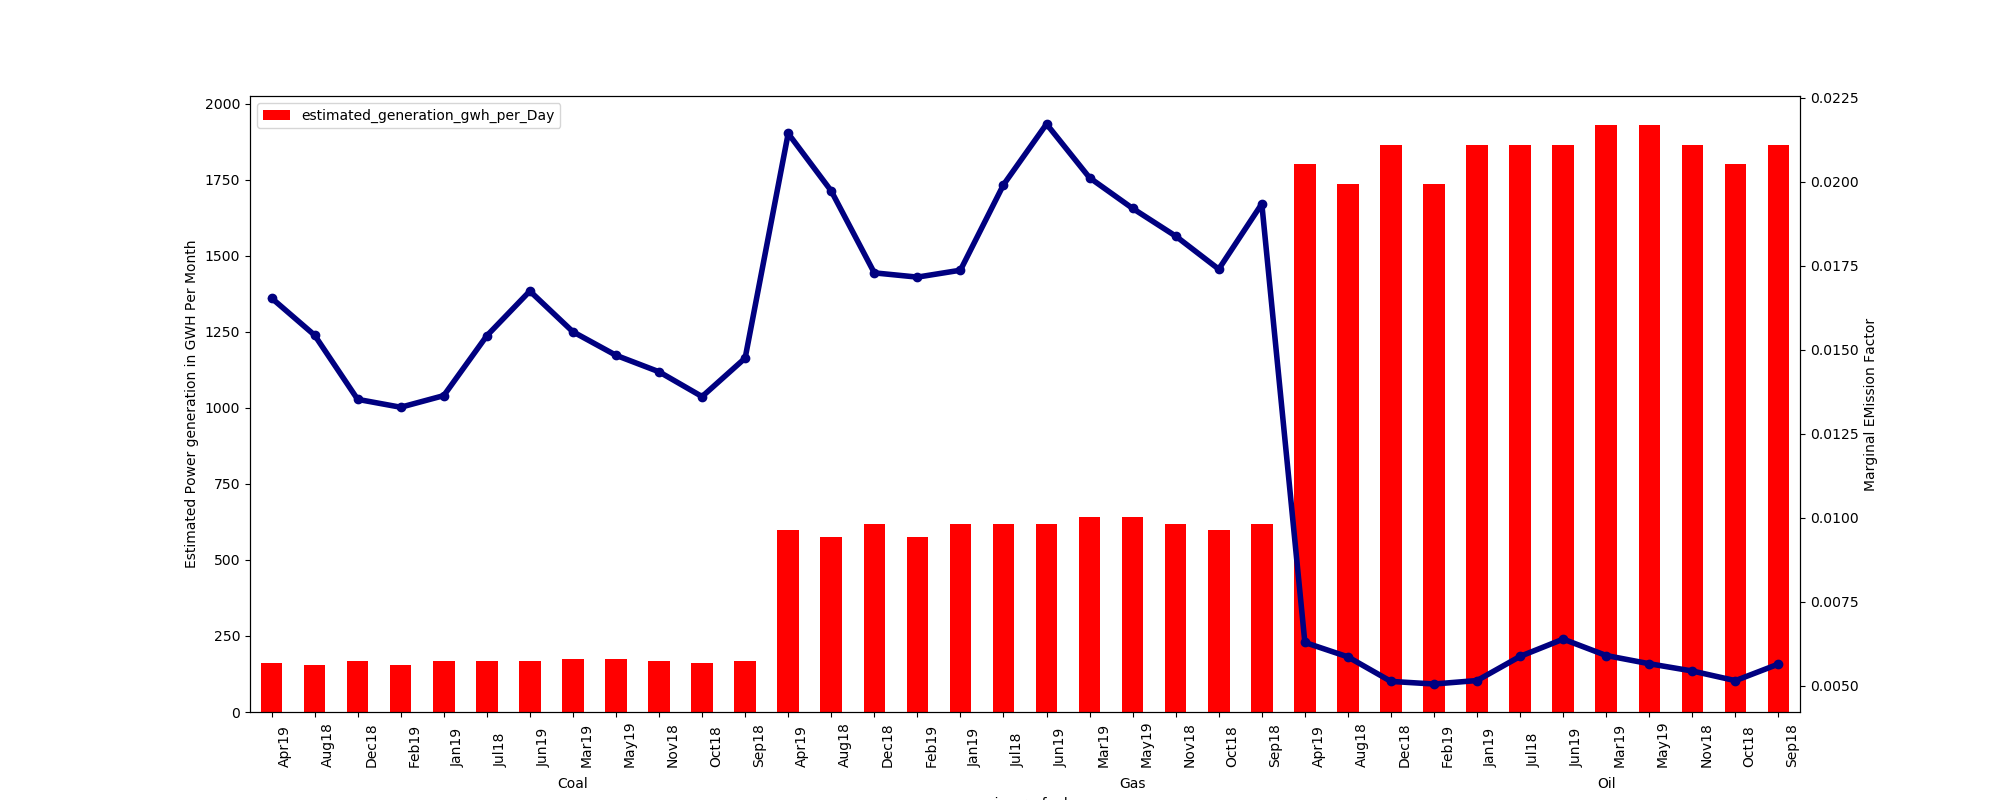


<p style="color:#703bdb; font-size:15px">Analysis within 100 mile buffer area from power plant</p>


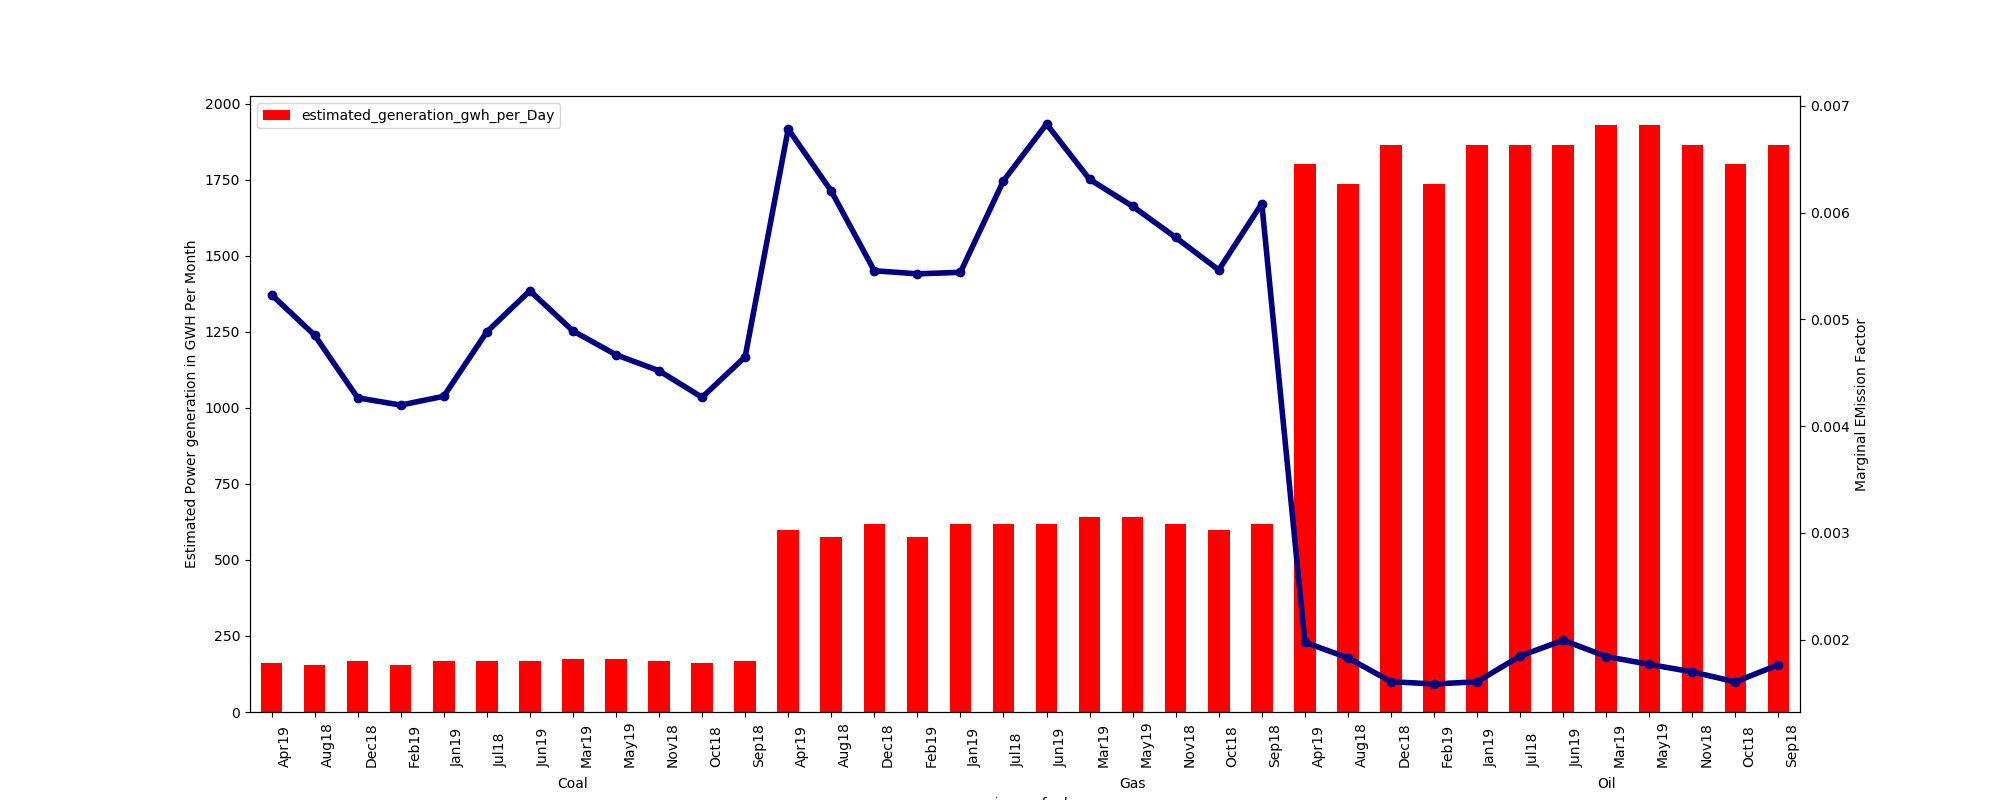

In [ ]:
from emissionspatial import emissionSpatialLayer
from emissionglobals import appGlobal
from emissionconfig import appConfig

objConfig = appConfig("/kaggle/input/ds4gconfiguration/config_kaggle.json")
outputPath = "/kaggle/working/output/"

aGlobal = appGlobal(objConfig, outputPath)

layerList = objConfig.getLayerList()

def calculateEmissionFactor():
    """
        This method get power plant x,y location as dataframe
    """
    for layer in layerList:
        print('processing layer ' + layer)
        spl = emissionSpatialLayer(aGlobal, layer)    
        dictSubRegions = spl.getSpatialLayerNPArr()

        print("calculate Marginal emission factor for power plants")
        if objConfig.getLayerType(layer) == "powerplant_subregion":
            me = marginalemissionfactor(aGlobal)
            me.calculateMarginalEmissions(layer)

<a href="https://www.kaggle.com/nagabilwanth/7-calc-ef-for-another-geographical-area" >Next: Part 7: Methodology to calculate the emissions factor of electricity for another geospatial area</a>